In [ ]:
!pip install networkx[default]

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G.add_node(1)

In [ ]:
G.add_nodes_from([2, 3])

In [ ]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [ ]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [ ]:
G.add_node(H)

In [ ]:
G.number_of_nodes()

11

In [ ]:
G.number_of_edges()

0

In [ ]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7af3425bb910>))

In [ ]:
import matplotlib.pyplot as plt

NetworkXError: Node <networkx.classes.graph.Graph object at 0x7af3425bb910> has no position.

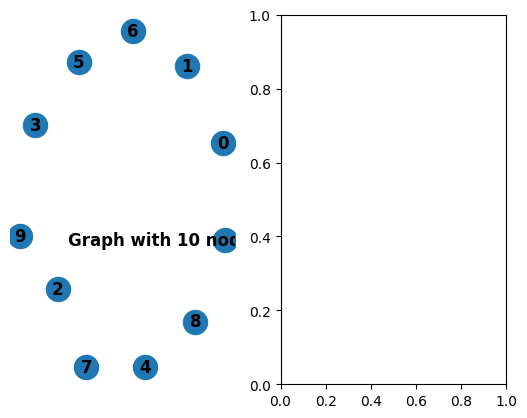

In [ ]:
#G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [ ]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [ ]:
!ls

sample_data  twitter_combined.txt.gz  twitter.tar.gz


In [ ]:
!unzip twitter_combined.txt.gz
!unzip twitter.tar.gz

Archive:  twitter_combined.txt.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of twitter_combined.txt.gz or
        twitter_combined.txt.gz.zip, and cannot find twitter_combined.txt.gz.ZIP, period.
Archive:  twitter.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of twitter.tar.gz or
        twitter.tar.gz.zip, and cannot find twitter.tar.gz.ZIP, period.


In [ ]:
!ls

sample_data  twitter_combined.txt.gz  twitter.tar.gz


In [ ]:
import tarfile
import gzip

# Step 1: Extract twitter.tar.gz
with tarfile.open('twitter.tar.gz', 'r:gz') as tar:
    tar.extractall('twitter_data')  # Extracts all files to 'twitter_data' folder

# Step 2: Read twitter_combined.txt.gz
twitter_combined_path = 'twitter_data/twitter_combined.txt.gz'
with gzip.open(twitter_combined_path, 'rt') as file:
    edges = file.readlines()
    # Display the first few lines of edges
    print("First few edges:", edges[:5])

# Step 3: Read readme-Ego.txt
readme_path = 'twitter_data/readme-Ego.txt'
with open(readme_path, 'r') as file:
    readme_content = file.read()
    # Display the contents of the readme
    print("\nReadme content:\n", readme_content)


In [ ]:
import networkx as nx
import gzip

# Step 1: Initialize an empty graph
G = nx.Graph()

# Step 2: Read edges from twitter_combined.txt.gz and add to the graph
twitter_combined_path = 'twitter_combined.txt.gz'
with gzip.open(twitter_combined_path, 'rt') as file:
    G = nx.parse_edgelist(file, delimiter=" ", create_using=nx.Graph(), nodetype=int)

# Step 3: Basic analysis of the graph
print("Graph Summary:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph connected? {'Yes' if nx.is_connected(G) else 'No'}")

# Optional: Display degree distribution (top 5 nodes with the highest degree)
degree_sequence = sorted((node, degree) for node, degree in G.degree())
print("\nTop 5 nodes by degree:")
for node, degree in degree_sequence[-5:]:
    print(f"Node {node}: Degree {degree}")


Graph Summary:
Number of nodes: 81306
Number of edges: 1342310
Is the graph connected? Yes

Top 5 nodes by degree:
Node 568627575: Degree 2
Node 568655523: Degree 1
Node 568699879: Degree 15
Node 568753458: Degree 1
Node 568770231: Degree 16


In [ ]:
import networkx as nx
import tarfile
import gzip
import os

# Step 1: Extract all files in twitter.tar.gz
tar_path = 'twitter.tar.gz'
extract_dir = 'twitter_data'
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

# Step 2: Load each network file as a separate graph in NetworkX
networks = {}  # Dictionary to store each graph
for file_name in os.listdir(extract_dir):
    file_path = os.path.join(extract_dir, file_name)
    if file_name.endswith('.txt'):  # Assuming each network is a .txt file
        G = nx.Graph()
        with open(file_path, 'r') as file:
            G = nx.parse_edgelist(file, delimiter=" ", create_using=nx.Graph(), nodetype=int)
        networks[file_name] = G
        print(f"Loaded {file_name} with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Step 3: Load the combined network from twitter_combined.txt.gz
combined_graph_path = os.path.join('twitter_combined.txt.gz')
with gzip.open(combined_graph_path, 'rt') as file:
    combined_graph = nx.parse_edgelist(file, delimiter=" ", create_using=nx.Graph(), nodetype=int)

# Step 4: Print summary of the combined graph
print("\nCombined Graph Summary:")
print(f"Number of nodes: {combined_graph.number_of_nodes()}")
print(f"Number of edges: {combined_graph.number_of_edges()}")
print(f"Is the combined graph connected? {'Yes' if nx.is_connected(combined_graph) else 'No'}")

# Optional: Analyze individual networks
print("\nIndividual Network Summaries:")
for network_name, G in networks.items():
    print(f"{network_name}: Nodes = {G.number_of_nodes()}, Edges = {G.number_of_edges()}")



Combined Graph Summary:
Number of nodes: 81306
Number of edges: 1342310
Is the combined graph connected? Yes

Individual Network Summaries:


In [ ]:
networks.items()

dict_items([])

In [ ]:
import networkx as nx
import tarfile
import gzip
import os

# Define paths
tar_path = 'twitter.tar.gz'  # Path to twitter.tar.gz
combined_path = 'twitter_combined.txt.gz'  # Path to twitter_combined.txt.gz
extract_dir = 'twitter_data'  # Directory to extract twitter.tar.gz contents

# Step 1: Extract twitter.tar.gz to the specified directory
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

# Step 2: Load each extracted network file as a separate graph
networks = {}  # Dictionary to store each network graph
for file_name in os.listdir(extract_dir):
    file_path = os.path.join(extract_dir, file_name)
    if file_name.endswith('.txt'):  # Assuming each network file has a .txt extension
        with open(file_path, 'r') as file:
            G = nx.parse_edgelist(file, delimiter=" ", create_using=nx.Graph(), nodetype=int)
        networks[file_name] = G
        print(f"Loaded network {file_name}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")

# Step 3: Load the combined edges as a single graph from twitter_combined.txt.gz
with gzip.open(combined_path, 'rt') as file:
    combined_graph = nx.parse_edgelist(file, delimiter=" ", create_using=nx.Graph(), nodetype=int)

# Step 4: Summary of the combined graph
print("\nCombined Graph Summary:")
print(f"Number of nodes: {combined_graph.number_of_nodes()}")
print(f"Number of edges: {combined_graph.number_of_edges()}")
print(f"Is the combined graph connected? {'Yes' if nx.is_connected(combined_graph) else 'No'}")

# Optional: Print summaries of individual networks
print("\nIndividual Network Summaries:")
for network_name, G in networks.items():
    print(f"{network_name}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")



Combined Graph Summary:
Number of nodes: 81306
Number of edges: 1342310
Is the combined graph connected? Yes

Individual Network Summaries:


In [ ]:
!ls

sample_data  twitter_combined.txt


In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import community

g = nx.read_edgelist("twitter_combined.txt", create_using=nx.Graph(), nodetype=int)
#print(nx.info(g))
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print("Graph is directed:", g.is_directed())

Number of nodes: 40478
Number of edges: 633735
Graph is directed: False


In [ ]:
spring_pos = nx.spring_layout(g)
parts = community.best_partition(g)
values = [parts.get(node) for node in g.nodes()]

plt.axis("off")
nx.draw_networkx(g,pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values,node_size=35, with_labels=False)
plt.show()

In [ ]:
nx.?

SyntaxError: invalid syntax (<ipython-input-5-3c48faeba1d8>, line 1)